the files are saved as a .data extension

In [163]:
# import the dataset
data = open("./breast-cancer.data")
feat = open("./breast-cancer.names")
data = data.read()
feat = feat.read()
print(data)
print(feat)

no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no
no-recurrence-events,50-59,ge40,25-29,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,lt40,10-14,0-2,no,1,left,right_up,no
no-recurrence-events,50-59,ge40,25-29,0-2,no,3,left,right_up,no
no-recurrence-events,40-49,premeno,30-34,0-2,no,3,left,left_up,no
no-recurrence-ev

In [164]:
data = data.replace('?','')
print(data)

no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no
no-recurrence-events,50-59,ge40,25-29,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,lt40,10-14,0-2,no,1,left,right_up,no
no-recurrence-events,50-59,ge40,25-29,0-2,no,3,left,right_up,no
no-recurrence-events,40-49,premeno,30-34,0-2,no,3,left,left_up,no
no-recurrence-ev

## EDA

#### Explore Names

In [165]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
from io import StringIO

data = StringIO(data)
data = pd.read_csv(data, sep=",")
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
   no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left   left_low  \
0  no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   right_up   
1  no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   left_low   
2  no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right    left_up   
3  no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right  right_low   
4  no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   left_low   

  no.1  
0   no  
1   no  
2   no  
3   no  
4   no  


In [166]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']
print(data.columns)
print(data.head())

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')
                  class    age menopause tumour_size inv_nodes node_caps  \
0  no-recurrence-events  40-49   premeno       20-24       0-2        no   
1  no-recurrence-events  40-49   premeno       20-24       0-2        no   
2  no-recurrence-events  60-69      ge40       15-19       0-2        no   
3  no-recurrence-events  40-49   premeno         0-4       0-2        no   
4  no-recurrence-events  60-69      ge40       15-19       0-2        no   

   deg_malig breast breast_quad irrad  
0          2  right    right_up    no  
1          2   left    left_low    no  
2          2  right     left_up    no  
3          2  right   right_low    no  
4          2   left    left_low    no  


In [167]:
print(data.info())
print('\n')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumour_size  285 non-null    object
 4   inv_nodes    285 non-null    object
 5   node_caps    277 non-null    object
 6   deg_malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast_quad  284 non-null    object
 9   irrad        285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB
None


        deg_malig
count  285.000000
mean     2.045614
std      0.737351
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000


In [168]:
print(data['class'].value_counts())

no-recurrence-events    200
recurrence-events        85
Name: class, dtype: int64


In [169]:
print(data['age'].value_counts())
print(data['menopause'].value_counts())
print(data['tumour_size'].value_counts())
print(data['inv_nodes'].value_counts())
print(data['node_caps'].value_counts())
print(data['deg_malig'].value_counts())
print(data['breast'].value_counts())
print(data['breast_quad'].value_counts())
print(data['irrad'].value_counts())

50-59    96
40-49    90
60-69    57
30-39    35
70-79     6
20-29     1
Name: age, dtype: int64
premeno    149
ge40       129
lt40         7
Name: menopause, dtype: int64
30-34    59
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumour_size, dtype: int64
0-2      212
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv_nodes, dtype: int64
no     221
yes     56
Name: node_caps, dtype: int64
2    130
3     84
1     71
Name: deg_malig, dtype: int64
left     151
right    134
Name: breast, dtype: int64
left_low     109
left_up       97
right_up      33
right_low     24
central       21
Name: breast_quad, dtype: int64
no     217
yes     68
Name: irrad, dtype: int64


Calculate **%** of missing values

In [170]:
nan = data.isna().sum()
tot = data.count()
perc = (nan*100)/tot

print(perc)

class          0.000000
age            0.000000
menopause      0.000000
tumour_size    0.000000
inv_nodes      0.000000
node_caps      2.888087
deg_malig      0.000000
breast         0.000000
breast_quad    0.352113
irrad          0.000000
dtype: float64


<AxesSubplot:xlabel='deg_malig'>

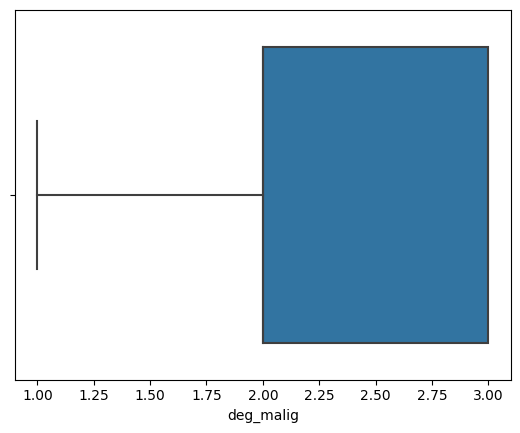

In [171]:
# find outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['deg_malig'])

There are no outliers as the data is one or another value. The only numeric column is the degree of malignancy which doesn't include any outliers

The target attribute is "class" either the patient had or not a reccurrence of the breast cancer

In [172]:
print(data.columns)

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')


In [173]:
data['class'] = data['class'].replace(['no-recurrence-events','recurrence-events'], [0,1])
data['age'] = data['age'].replace(['20-29', '30-39','40-49','50-59','60-69','70-79'],[0,1,2,3,4,5])
data['menopause'] = data['menopause'].replace(['premeno','ge40','lt40'],[0,1,2])
data['tumour_size'] = data['tumour_size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],[0,1,2,3,4,5,6,7,8,9,10])
data['inv_nodes'] = data['inv_nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],[0,1,2,3,4,5,6])
data['node_caps'] = data['node_caps'].replace(['no','yes'],[0,1])
data['breast'] = data['breast'].replace(['left','right'],[0,1])
data['breast_quad'] = data['breast_quad'].replace(['left_low','left_up','right_up','right_low','central'],[0,1,2,3,4])
data['irrad'] = data['irrad'].replace(['no','yes'],[0,1])
print(data)

     class  age  menopause  tumour_size  inv_nodes  node_caps  deg_malig  \
0        0    2          0            4          0        0.0          2   
1        0    2          0            4          0        0.0          2   
2        0    4          1            3          0        0.0          2   
3        0    2          0            0          0        0.0          2   
4        0    4          1            3          0        0.0          2   
..     ...  ...        ...          ...        ...        ...        ...   
280      1    1          0            6          0        0.0          2   
281      1    1          0            4          0        0.0          3   
282      1    4          1            4          0        0.0          1   
283      1    2          1            6          1        0.0          3   
284      1    3          1            6          1        0.0          3   

     breast  breast_quad  irrad  
0         1          2.0      0  
1         0        

<AxesSubplot:>

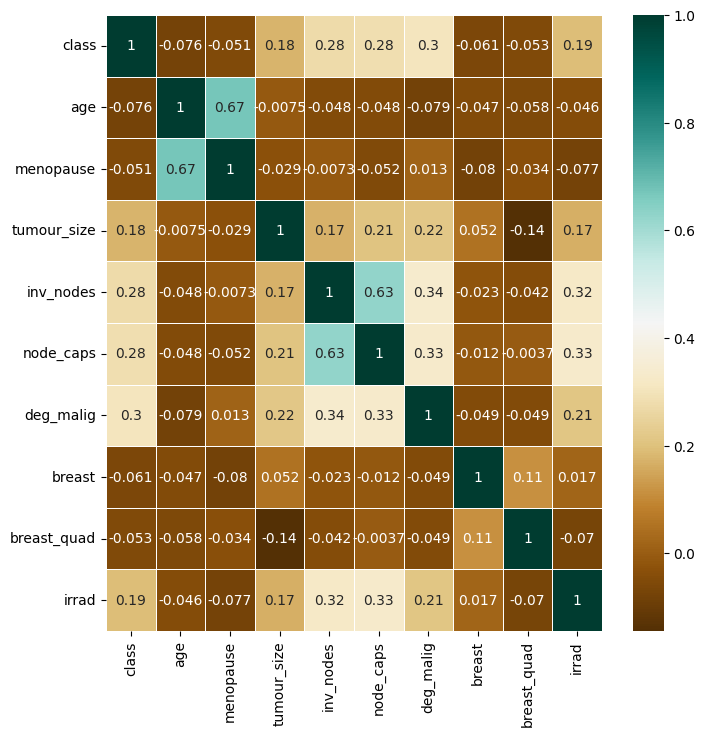

In [178]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(data.corr(), cmap='BrBG', annot=True, linewidth=.5)